<a href="https://colab.research.google.com/github/kmk028/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics


## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [1]:
import math

def Mean(array):
  total = 0
  n = len(array)
  for i in range(n):
    total = total + array[i]
    i = i+1;
  #print(f'Mean of the list is {total/n}')
  return (total/n)

def var(array):
  total = 0
  n = len(array)
  for i in range(n):
    total = total + (array[i]-Mean(array))**2
    i = i+1
  print(f'Variance of the list is {total/n}')
  return (total/n)

def std_dev(array):
  v = var(array)
  print (f'Standard Deviation of list is {math.sqrt(v)}')
  return v

array1 = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
std_dev(array1)


Variance of the list is 183761.06122448976
Standard Deviation of list is 428.67360686714756


183761.06122448976

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [2]:
import numpy as np

num_cust_last_week = [127, 80, 105, 92, 120, 115, 93]
sales_last_week = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

np.cov(num_cust_last_week,sales_last_week)

array([[   290.95238095,   7604.35714286],
       [  7604.35714286, 214387.9047619 ]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [3]:
s = std_dev(num_cust_last_week)
t = std_dev(sales_last_week)

corr_co = np.cov(num_cust_last_week,sales_last_week)/(s*t)

print(corr_co)

Variance of the list is 249.3877551020408
Standard Deviation of list is 15.792015549069118
Variance of the list is 183761.06122448976
Standard Deviation of list is 428.67360686714756
[[6.34882417e-06 1.65933430e-04]
 [1.65933430e-04 4.67812330e-03]]


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [4]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

df.isnull().sum()

Unnamed: 0             0
pclass                 1
survived               1
name                   1
sex                    1
age                    0
sibsp                  1
parch                  1
ticket                 1
fare                   2
cabin               1015
embarked               0
boat                 824
body                1189
home.dest            565
has_cabin_number       0
dtype: int64

In [5]:
df.shape

(1310, 16)

In [6]:
df.dtypes

Unnamed: 0            int64
pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [12]:
df.sample(10)

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
961,962,3.0,0.0,"Lennon, Miss. Mary",female,29.881135,1.0,0.0,370371,15.5000,NaN,Q,NaN,NaN,NaN,0
111,112,1.0,1.0,"Fortune, Miss. Alice Elizabeth",female,24.000000,3.0,2.0,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB",1
18,19,1.0,1.0,"Bazzani, Miss. Albina",female,32.000000,0.0,0.0,11813,76.2917,D15,C,8,NaN,NaN,1
366,367,2.0,0.0,"Carter, Rev. Ernest Courtenay",male,54.000000,1.0,0.0,244252,26.0000,NaN,S,NaN,NaN,London,0
1191,1192,3.0,0.0,"Saundercock, Mr. William Henry",male,20.000000,0.0,0.0,A/5. 2151,8.0500,NaN,S,NaN,NaN,NaN,0
959,960,3.0,0.0,"Leinonen, Mr. Antti Gustaf",male,32.000000,0.0,0.0,STON/O 2. 3101292,7.9250,NaN,S,NaN,NaN,NaN,0
336,337,2.0,1.0,"Beane, Mr. Edward",male,32.000000,1.0,0.0,2908,26.0000,NaN,S,13,NaN,"Norwich / New York, NY",0
1066,1067,3.0,0.0,"Novel, Mr. Mansouer",male,28.500000,0.0,0.0,2697,7.2292,NaN,C,NaN,181.0,NaN,0
540,541,2.0,1.0,"Quick, Miss. Phyllis May",female,2.000000,1.0,1.0,26360,26.0000,NaN,S,11,NaN,"Plymouth, Devon / Detroit, MI",0
1140,1141,3.0,0.0,"Reynolds, Mr. Harold J",male,21.000000,0.0,0.0,342684,8.0500,NaN,S,NaN,NaN,NaN,0


In [17]:
df.columns

Index(['Unnamed: 0', 'pclass', 'survived', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body',
       'home.dest', 'has_cabin_number'],
      dtype='object')

In [0]:
df = df.drop(columns = ['Unnamed: 0','body']) # Dropping columns 'Unnamed: 0' since its just row # and 'body' since most of it is NaN 

In [19]:
df.select_dtypes('number').cov()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,10.976961
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,0.174613


In [20]:
df.select_dtypes('number').corr()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,0.507253
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
#function to plot vector

import matplotlib.pyplot as plt

def graph_vector(ax,ay,head_wid,head_len,col):
  plt.arrow(0,0,ax,ay,head_width = head_wid,head_length = head_len,color=col)
  
  
  

(0, 1.5)

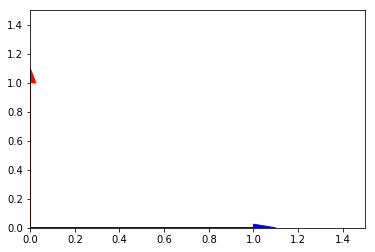

In [26]:
graph_vector(1,0,0.05,0.1,'b')
graph_vector(0,1,0.05,0.1,'r')
plt.xlim(0,1.5)
plt.ylim(0,1.5)

Another word for orthogonal is Perpendicular

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [28]:
a = [-5, 3, 7]
b = [6,-8,2]
if (np.dot(a,b) == 0):
  print('vectors are orthogonal')
else:
  print('vectors are not orthogonal')

vectors are not orthogonal


dot product between vectors is non zero which means angle between them is not 90. Hence they are not orthogonal to each other.

dot Product is a.b.cos(angle bet a and b)

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [32]:
c = np.array ([2,-15,6,20])
print (np.linalg.norm(c)**2)

665.0


In [33]:
print (np.dot(c,c))

665


In [34]:
print (np.matmul(c,c.T))

665


All 3 values are same

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

Your text here

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

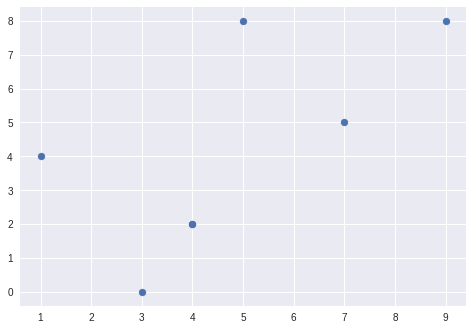

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()